In [122]:
import ipywidgets as widgets    
import numpy as np
import matplotlib.image as mpimg

from IPython.display import display    
colour = widgets.ColorPicker(concise=False, description='Pick first color', value='#000000', disabled=False)
display(colour)


A Jupyter Widget

In [123]:
lower_b = np.array([int(colour.value[1:3], 16), int(colour.value[3:5], 16), int(colour.value[5:7], 16)])
print('First Color in RGB', lower_b)

First Color in RGB [0 0 0]


In [124]:
colour = widgets.ColorPicker(concise=False, description='Pick second color', value='#000000', disabled=False)
display(colour)


A Jupyter Widget

In [125]:
upper_b = np.array([int(colour.value[1:3], 16), int(colour.value[3:5], 16), int(colour.value[5:7], 16)])
print('Second Color in RGB', upper_b)

Second Color in RGB [0 0 0]


In [126]:
# переводим в HSV 
import cv2

lower_b = cv2.cvtColor( np.uint8([[lower_b]]), cv2.COLOR_RGB2HSV)[0][0]
upper_b = cv2.cvtColor( np.uint8([[upper_b]]), cv2.COLOR_RGB2HSV)[0][0]


In [127]:
# меняем границы местами, если у первого Hue больше, чем у второго выбранного цвет
print(lower_b)
print(upper_b)

if (lower_b[0]>upper_b[0]):
    upper_b,lower_b = lower_b,upper_b

[0 0 0]
[0 0 0]


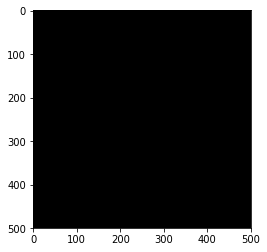

In [128]:
import matplotlib.pyplot as plt

#Выводим диапазон
s_gradient = np.ones((500,1), dtype=np.uint8)*np.linspace(lower_b[1], upper_b[1], 500, dtype=np.uint8)
v_gradient = np.rot90(np.ones((500,1), dtype=np.uint8)*np.linspace(lower_b[1], upper_b[1], 500, dtype=np.uint8))
h_array = np.arange(lower_b[0], upper_b[0]+1)
for hue in h_array:
    h = hue*np.ones((500,500), dtype=np.uint8)
    hsv_color = cv2.merge((h, s_gradient, v_gradient))
    rgb_color = cv2.cvtColor(hsv_color, cv2.COLOR_HSV2RGB)
    plt.imshow(rgb_color) # диапазон в RGB пространстве
    plt.show()    
    cv2.waitKey(250)

Source Image (RGB)


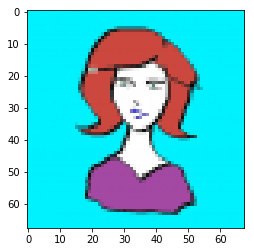

Source Image (HSV)


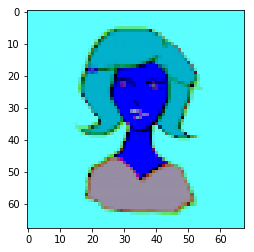

In [129]:
source_img_rgb = cv2.imread('original.png')
print("Source Image (RGB)")
plt.imshow(source_img_rgb) # Source Image (RGB)
plt.show()

# Переход в пространство HSV
source_image_hsv = cv2.cvtColor(source_img_rgb, cv2.COLOR_RGB2HSV)
print("Source Image (HSV)")
plt.imshow(source_image_hsv) # Source Image (HSV)
plt.show()


In [130]:
# Применение маски
mask = np.zeros(shape=(source_img_rgb.shape[0], source_img_rgb.shape[1]), dtype=bool)
mask = cv2.inRange(source_image_hsv, lower_b, upper_b)

res_image_hsv = cv2.bitwise_and(source_image_hsv, source_image_hsv, mask=mask)
res_image_rgb = cv2.cvtColor(res_image_hsv, cv2.COLOR_HSV2RGB)

RESULT image (HSV)


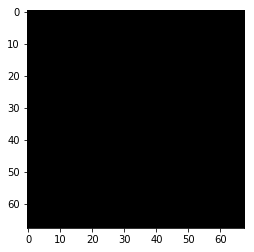

RESULT image (RGB)


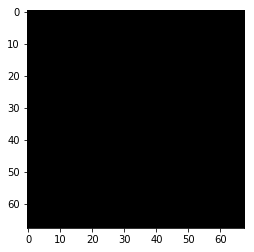

In [131]:

print("RESULT image (HSV)")
plt.imshow(res_image_hsv) # "RESULT image (HSV)"
plt.show()
print("RESULT image (RGB)")
plt.imshow(res_image_rgb) # "RESULT image (RGB)"
plt.show()

mpimg.imsave("result_dz_0.png", res_image_rgb)
